# <font> Problem Statement </font>

Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.



**Content
Attributes**

* People

    * ID: Customer's unique identifier
    * Year_Birth: Customer's birth year
    * Education: Customer's education level
    * Marital_Status: Customer's marital status
    * Income: Customer's yearly household income
    * Kidhome: Number of children in customer's household
    * Teenhome: Number of teenagers in customer's household
    * Dt_Customer: Date of customer's enrollment with the company
    * Recency: Number of days since customer's last purchase
    * Complain: 1 if customer complained in the last 2 years, 0 otherwise
* Products

    * MntWines: Amount spent on wine in last 2 years
    * MntFruits: Amount spent on fruits in last 2 years
    * MntMeatProducts: Amount spent on meat in last 2 years
    * MntFishProducts: Amount spent on fish in last 2 years
    * MntSweetProducts: Amount spent on sweets in last 2 years
    * MntGoldProds: Amount spent on gold in last 2 years
* Promotion

    * NumDealsPurchases: Number of purchases made with a discount
    * AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
    * AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
    * AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
    * AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
    * AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
    *( Response: 1 if customer accepted the offer in the last campaign, 0 otherwise)
* Place

    * NumWebPurchases: Number of purchases made through the company’s web site
    * NumCatalogPurchases: Number of purchases made using a catalogue
    * NumStorePurchases: Number of purchases made directly in stores
    * NumWebVisitsMonth: Number of visits to company’s web site in the last month

<a href="url"> https://www.kaggle.com/imakash3011/customer-personality-analysis </a>

## Importing libraries

In [271]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import opendatasets as od
import os
import seaborn as sns

import plotly.express as px
import datetime as dt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

## Exploratory data analysis and Feature Engineering 

In [107]:
customer_data = pd.read_csv('marketing_campaign.csv', sep='\t')

In [108]:
customer_data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [269]:
# customer_data.columns

In [270]:
# customer_data.describe()

In [111]:
customer_data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

We see that there are some missing values in income column and as they are very less in number we are going to drop them .

In [112]:
customer_data = customer_data.fillna(customer_data.Income.mean())

In [114]:
customer_data['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [115]:
customer_data.Education = customer_data.Education.replace(['PhD','Graduation', 'Master'], 'fully_Graduated')
# Converting education into the basis of graduation times
customer_data.Education = customer_data.Education.replace(['Basic', '2n Cycle'], 'under_Graduated')

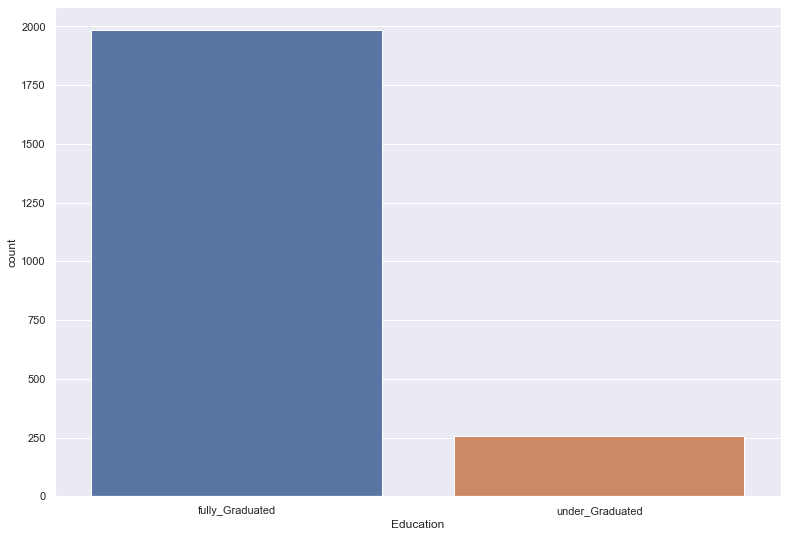

In [116]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(13,9))
ax = sns.countplot(x="Education", data=customer_data)

In [117]:
customer_data['Education'].unique()

array(['fully_Graduated', 'under_Graduated'], dtype=object)

In [118]:
customer_data.Marital_Status = customer_data.Marital_Status.replace(['Married','Together'], 'Partner')

customer_data.Marital_Status = customer_data.Marital_Status.replace(['Single','Divorced', 'Widow', 'Alone','Absurd', 'YOLO'], 'Single')

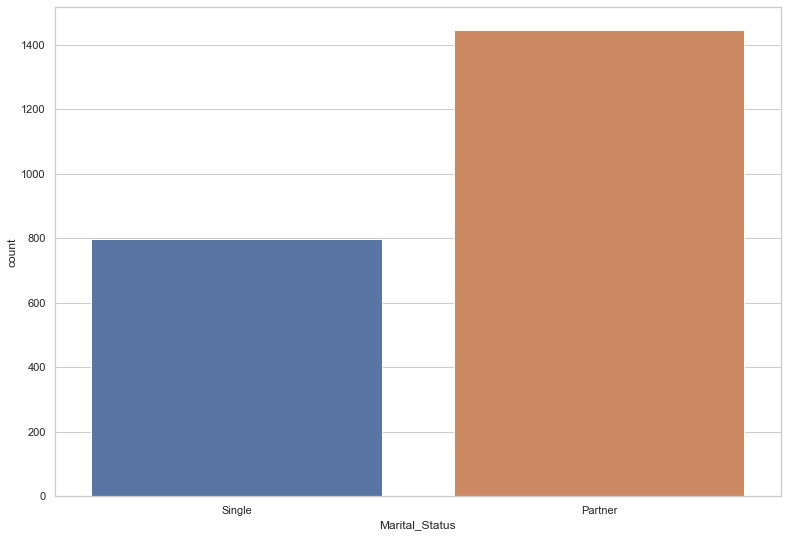

In [119]:

sns.set_theme(style="whitegrid")
plt.figure(figsize=(13,9))
ax = sns.countplot(x="Marital_Status", data=customer_data )



In [120]:
import datetime as dt
customer_data['Age'] = 2015 - customer_data.Year_Birth

In [121]:
customer_data.loc[(customer_data['Age'] >= 13) & (customer_data['Age'] <= 19), 'AgeGroup'] = 'Teen'
customer_data.loc[(customer_data['Age'] >= 20) & (customer_data['Age']<= 39), 'AgeGroup'] = 'Adult'
customer_data.loc[(customer_data['Age'] >= 40) & (customer_data['Age'] <= 59), 'AgeGroup'] = 'Middle Age Adult'
customer_data.loc[(customer_data['Age'] > 60), 'AgeGroup'] = 'Senior Adult'

In [122]:
customer_data['Children'] = customer_data['Kidhome'] + customer_data['Teenhome']
customer_data['HasChild'] = np.where(customer_data['Children']>0, 'HasChild', 'NoChild')

In [123]:
customer_data.rename(columns = {'MntMeatProducts':'Meat','MntFishProducts':'Fish','MntSweetProducts':'Sweet','MntGoldProds':'Gold','MntWines':'Wines','MntFruits':'Fruits'},inplace = True)

In [124]:
customer_data['Spendings'] = customer_data['Wines']+customer_data['Fruits']+customer_data['Meat']+customer_data['Fish']+customer_data['Sweet']+customer_data['Gold']

In [47]:
customer_data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,AgeGroup,Children,HasChild,Spendings
0,5524,1957,fully_Graduated,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,3,11,1,58,Middle Age Adult,0,NoChild,1617
1,2174,1954,fully_Graduated,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,3,11,0,61,Senior Adult,2,HasChild,27
2,4141,1965,fully_Graduated,Partner,71613.0,0,0,21-08-2013,26,426,...,0,0,3,11,0,50,Middle Age Adult,0,NoChild,776
3,6182,1984,fully_Graduated,Partner,26646.0,1,0,10-02-2014,26,11,...,0,0,3,11,0,31,Adult,1,HasChild,53
4,5324,1981,fully_Graduated,Partner,58293.0,1,0,19-01-2014,94,173,...,0,0,3,11,0,34,Adult,1,HasChild,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,fully_Graduated,Partner,61223.0,0,1,13-06-2013,46,709,...,0,0,3,11,0,48,Middle Age Adult,1,HasChild,1341
2236,4001,1946,fully_Graduated,Partner,64014.0,2,1,10-06-2014,56,406,...,0,0,3,11,0,69,Senior Adult,3,HasChild,444
2237,7270,1981,fully_Graduated,Single,56981.0,0,0,25-01-2014,91,908,...,0,0,3,11,0,34,Adult,0,NoChild,1241
2238,8235,1956,fully_Graduated,Partner,69245.0,0,1,24-01-2014,8,428,...,0,0,3,11,0,59,Middle Age Adult,1,HasChild,843


Main references :

<a href="url"> * https://www.kaggle.com/yasirhussain1987/customer-segmentation-using-k-means 
    
</a>

<a href="url">  * https://www.kaggle.com/mohsensadriaghdam/customer-personality-analysis-k-means-clustering#Clustering-with-K-means</a>

*https://www.kaggle.com/comman/kmeans-for-this-work

# Task -1 Build a unsupervised algorithm to cluster customer data 

In [162]:
features = ['Income', 'Spendings']
dt_Kmeans = customer_data[features]
dt_Kmeans.head()

,Income,Spendings
0,58138.0,1617
1,46344.0,27
2,71613.0,776
3,26646.0,53
4,58293.0,422


In [164]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(dt_Kmeans)
X=X_scaled

#Kmeans
model = KMeans(n_clusters= 4, random_state=0, max_iter = 10000)
model.fit(X)
labels = model.predict(X)
labels

array([1, 2, 0, ..., 0, 0, 2], dtype=int32)

In [165]:
model = KMeans(n_clusters=4, init='k-means++', random_state=42).fit(X)

preds = model.predict(X)

dt_Kmeans = customer_data[features]
dt_Kmeans['clusters'] = preds

<ipython-input-165-16b6ea427ca3>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt_Kmeans['clusters'] = preds


In [171]:
customer_data['clusters']=preds

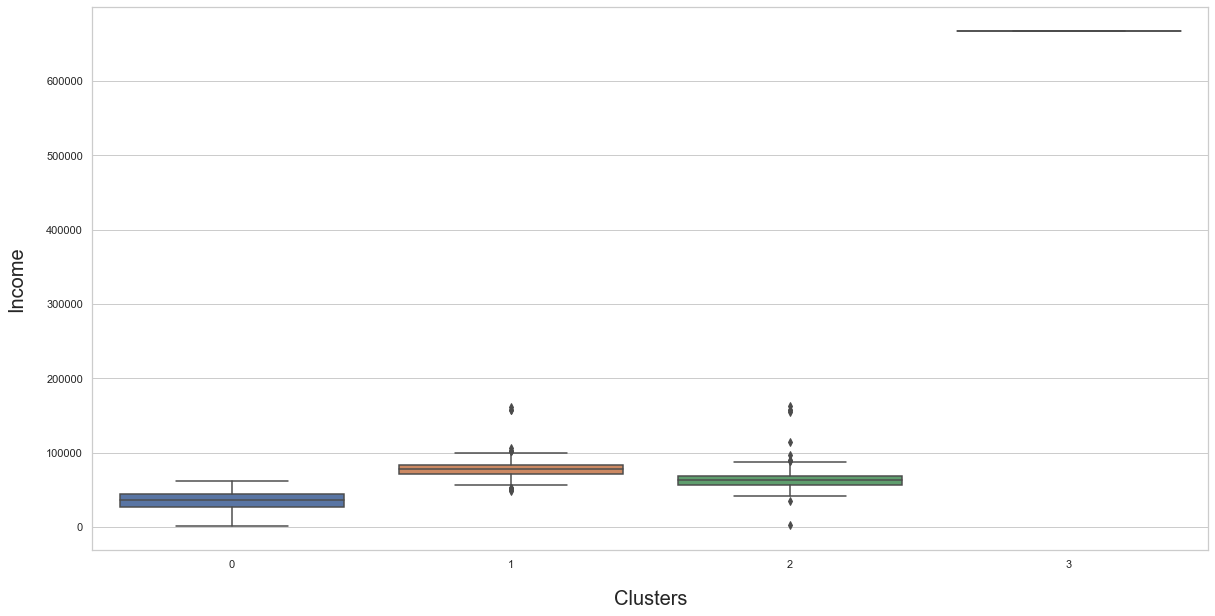

In [184]:
plt.figure(figsize=(20,10))

sns.boxplot(data=customer_data, x='clusters', y = 'Income');
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('Income', fontsize=20, labelpad=20);

Observation: Here we see that the clusters are divided into various income levels , also we see that the cluster 3 has very less points 

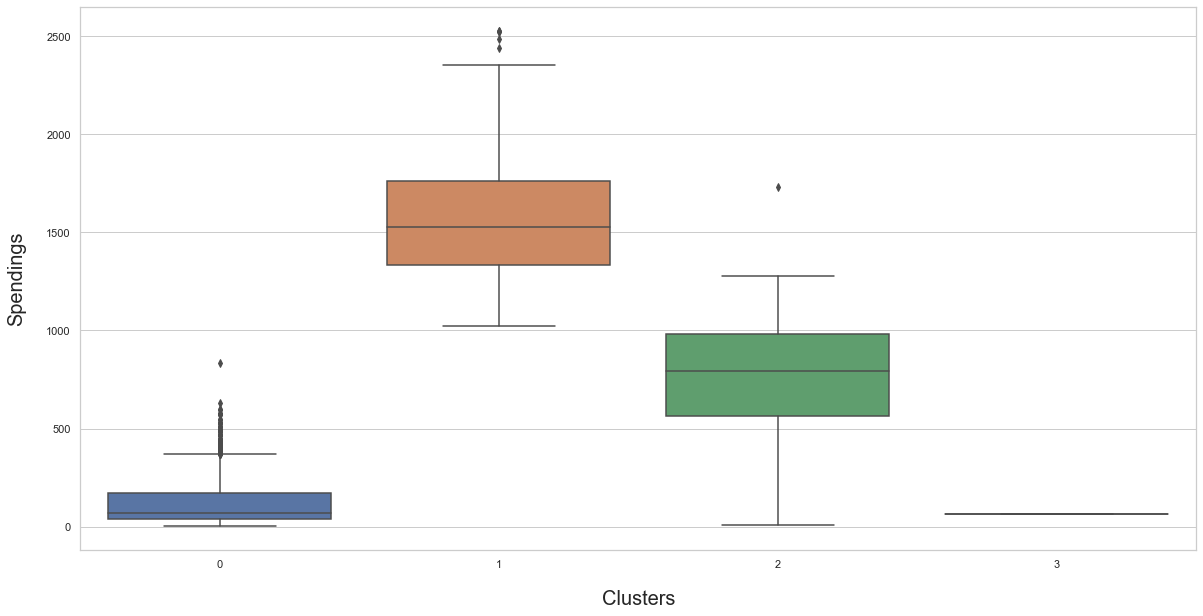

In [168]:
plt.figure(figsize=(20,10))

sns.boxplot(data=customer_kmeans, x='clusters', y = 'Spendings');
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('Spendings', fontsize=20, labelpad=20);

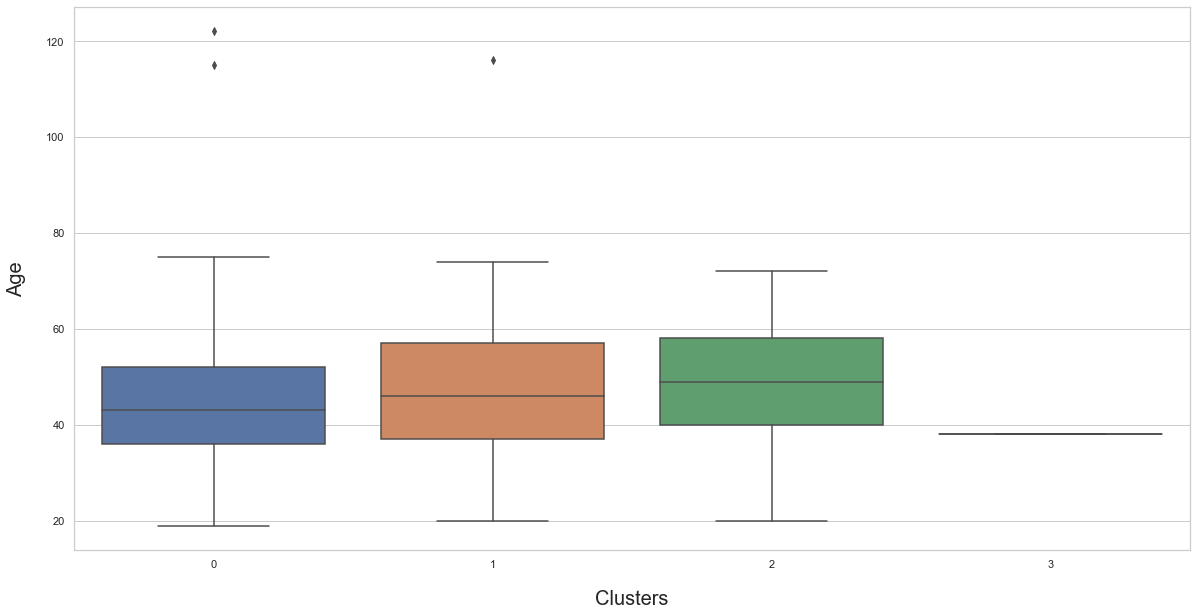

In [173]:
plt.figure(figsize=(20,10))

sns.boxplot(data=customer_data, x='clusters', y = 'Age');
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('Age', fontsize=20, labelpad=20);

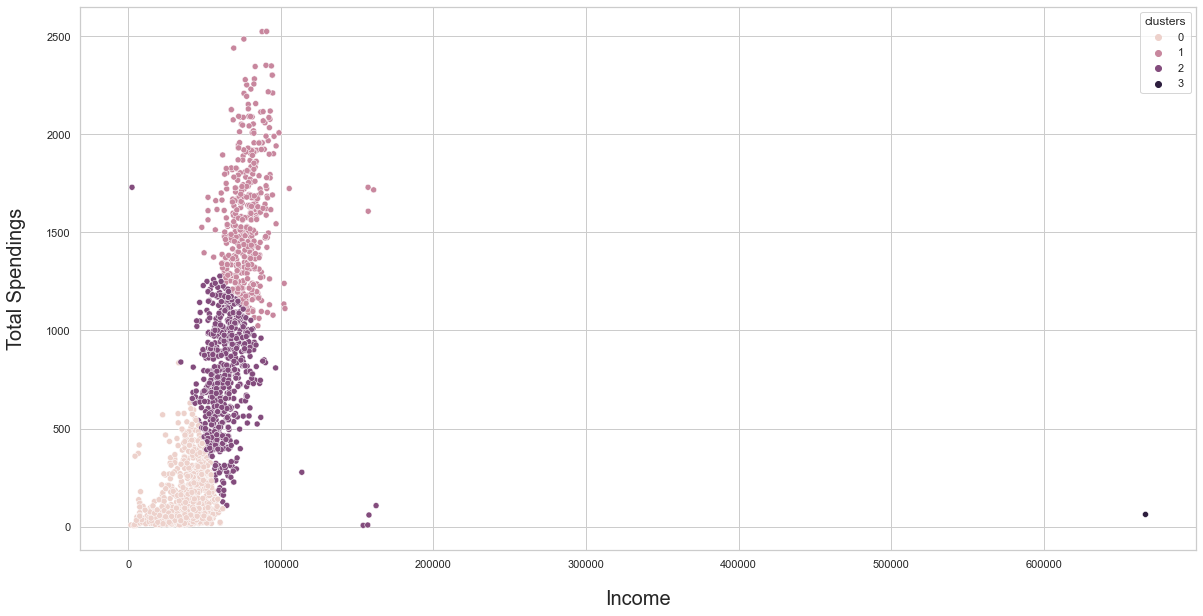

In [175]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=customer_data, x='Income', y='Spendings', hue='clusters');
plt.xlabel('Income', fontsize=20, labelpad=20)
plt.ylabel('Total Spendings', fontsize=20, labelpad=20);

Hence we have developed multiple cluster mostly based on the income and spending of the customer , like high income and high spending customer , high income and low spending customer , low income low spending customer and a very few points of customers who are low income and high spending customers . This gives us an understanding on the various targets to the company.

# Task-2 Build a classification model on the promotion done by the company

In [180]:
customer_data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'Wines', 'Fruits', 'Meat', 'Fish',
       'Sweet', 'Gold', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'AgeGroup', 'Children', 'HasChild', 'Spendings', 'clusters'],
      dtype='object')

In [213]:
# customer_data['AcceptedCmp1'].tolist()

In [187]:
count_lis=[]
for i in range (0, len(customer_data)):
    a=customer_data['AcceptedCmp1'].tolist()[i]
    b=customer_data['AcceptedCmp2'].tolist()[i]
    c=customer_data['AcceptedCmp3'].tolist()[i]
    d=customer_data['AcceptedCmp4'].tolist()[i]
    e=customer_data['AcceptedCmp5'].tolist()[i]
    
    promotion_count=a+b+c+d+e
    count_lis.append(promotion_count)

In [190]:
cus_data=customer_data

In [191]:
cus_data["count_prom"]=count_lis
# with this code we observe that there are customers who have accepted multiple promotions hence we cannot overlap the promotions on one another 

In [189]:
object_columns=customer_data.select_dtypes(include=["object_"]).columns
num_columns=customer_data.select_dtypes(include=["number"]).columns

In [267]:
y

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0
...,...,...,...,...,...
2235,0,0,0,0,0
2236,1,0,0,0,0
2237,0,0,0,1,0
2238,0,0,0,0,0


In [192]:
y1=customer_data['AcceptedCmp1'].tolist()
y2=customer_data['AcceptedCmp2'].tolist()
y3=customer_data['AcceptedCmp3'].tolist()
y4=customer_data['AcceptedCmp4'].tolist()
y5=customer_data['AcceptedCmp5'].tolist()

In [194]:
x=customer_data.drop(['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5'],axis=1)

In [196]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [197]:
for i in range (0, len(object_columns)):
        enc = LabelEncoder()
        x[object_columns[i]]=enc.fit_transform(x[object_columns[i]])

In [198]:
ss = StandardScaler()
numeric_feats=x.select_dtypes(include=["number"]).columns
x[numeric_feats] = ss.fit_transform(x[numeric_feats].values)

In [217]:
from sklearn.multioutput import MultiOutputClassifier

In [224]:
y=customer_data[['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5']]

In [243]:
from sklearn.model_selection import train_test_split
X_train_a, X_validation_a, y_train_a, y_validation_a= train_test_split(x,y, train_size=0.7, random_state=1234)

In [244]:
clf = MultiOutputClassifier(XGBClassifier(eval_metric='mlogloss', use_label_encoder=False)).fit(X_train_a, y_train_a)

In [246]:
y_pred=clf.predict(X_validation_a)

In [257]:
X_train, X_test, y_train, y_test = train_test_split(x, y1, test_size=0.2, random_state=7)
xgb_train = xgboost.DMatrix(X_train, label=y_train)
xgb_test = xgboost.DMatrix(X_test, label=y_test)

In [263]:
list_prom=[y1,y2,y3,y4,y5]

In [264]:
shap_values_lis=[]
for i in range (0, len(list_prom)):
    params = {
        "eta": 0.002,
        "max_depth": 3,
        "objective": "survival:cox",
        "subsample": 0.5
    }
    X_train, X_test, y_train, y_test = train_test_split(x, list_prom[i], test_size=0.2, random_state=7)
    xgb_train = xgboost.DMatrix(X_train, label=y_train)
    xgb_test = xgboost.DMatrix(X_test, label=y_test)

    model_train = xgboost.train(params, xgb_train, 10000, evals = [(xgb_test, "test")], verbose_eval=1000)

    shap_values = shap.TreeExplainer(model_train).shap_values(x)
    
    shap_values_lis.append(shap_values)

[0]	test-cox-nloglik:3.43399
[1000]	test-cox-nloglik:3.46298
[2000]	test-cox-nloglik:3.48468
[3000]	test-cox-nloglik:3.49473
[4000]	test-cox-nloglik:3.50159
[5000]	test-cox-nloglik:3.50566
[6000]	test-cox-nloglik:3.51134
[7000]	test-cox-nloglik:3.51523
[8000]	test-cox-nloglik:3.51879
[9000]	test-cox-nloglik:3.52154
[9999]	test-cox-nloglik:3.52326
[0]	test-cox-nloglik:1.09861
[1000]	test-cox-nloglik:1.11662
[2000]	test-cox-nloglik:1.12026
[3000]	test-cox-nloglik:1.12269
[4000]	test-cox-nloglik:1.12398
[5000]	test-cox-nloglik:1.12481
[6000]	test-cox-nloglik:1.12559
[7000]	test-cox-nloglik:1.12622
[8000]	test-cox-nloglik:1.12665
[9000]	test-cox-nloglik:1.12684
[9999]	test-cox-nloglik:1.12698
[0]	test-cox-nloglik:3.17806
[1000]	test-cox-nloglik:3.22211
[2000]	test-cox-nloglik:3.25826
[3000]	test-cox-nloglik:3.27656
[4000]	test-cox-nloglik:3.28631
[5000]	test-cox-nloglik:3.29556
[6000]	test-cox-nloglik:3.30194
[7000]	test-cox-nloglik:3.30667
[8000]	test-cox-nloglik:3.31421
[9000]	test-cox-n

In [261]:
shap_values = shap.TreeExplainer(model_train).shap_values(x)

Shap values for AcceptedCmp0 


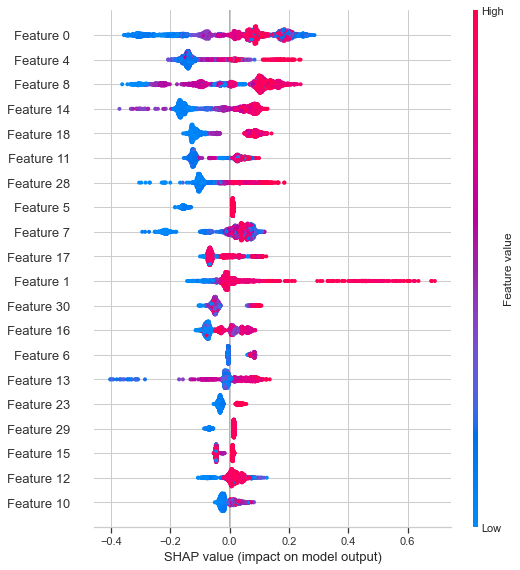

Shap values for AcceptedCmp1 


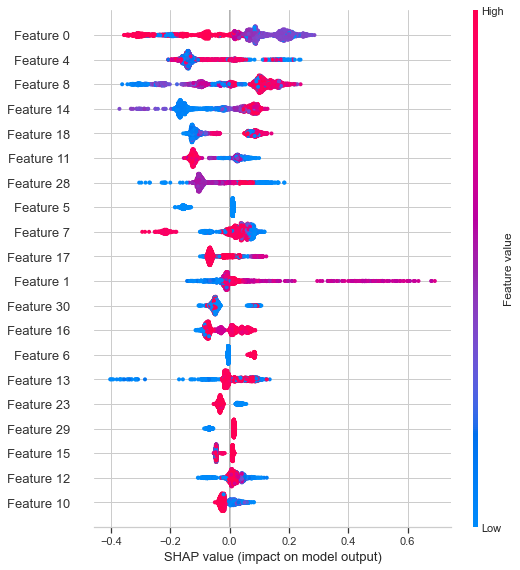

Shap values for AcceptedCmp2 


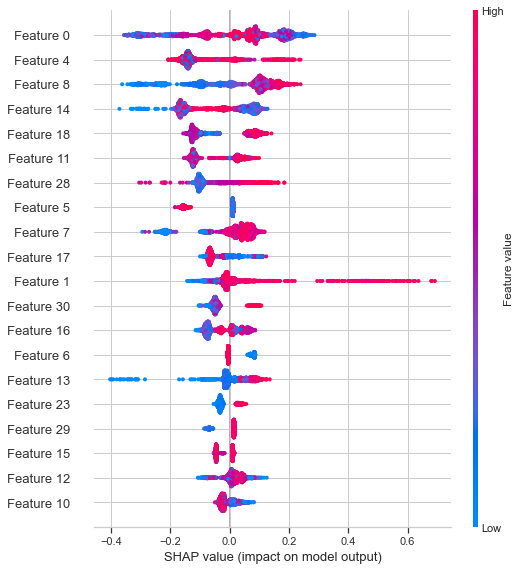

Shap values for AcceptedCmp3 


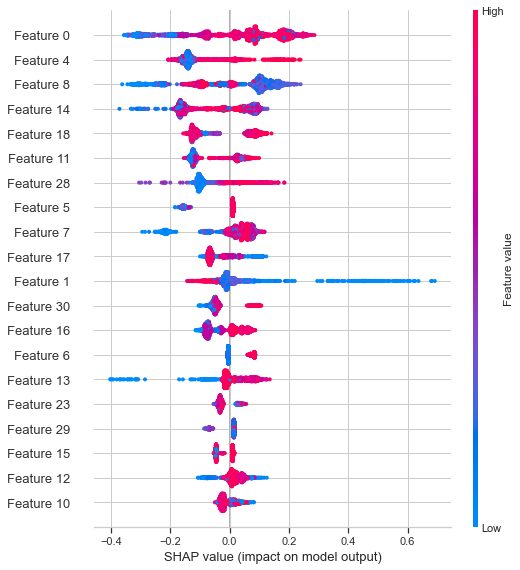

Shap values for AcceptedCmp4 


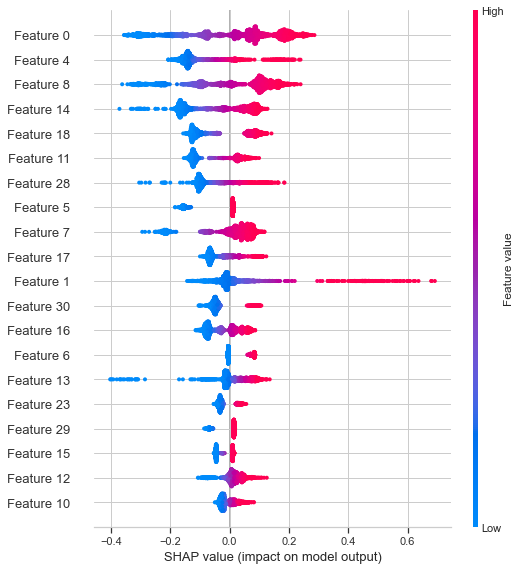

In [268]:
for i in range (0, len(shap_values_lis)):
    print("Shap values for AcceptedCmp{} ".format(i))
    shap.summary_plot(shap_values,shap_values_lis[i] )

We see that with the SHAP values for each of the model's rescpective values we see that :
1. Feature 0 , 14, 13 have had a negative impact on the model , although there is some merit to some postive impact there is more negative impact to the model.
2.Feature 1 seems to have lot of low positive Impact on the model .
(Feature numbers represent the index of the features in the dataset)

# Another approach towards prediction of values

In [202]:
model1 = XGBClassifier()
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model1
scores = cross_val_score(model1, x, y2, scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC: %.5f' % mean(scores))

Mean ROC AUC: 0.98839


In [203]:
model = XGBClassifier()
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, x, y3, scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC: %.5f' % mean(scores))

Mean ROC AUC: 0.97953


In [204]:
model = XGBClassifier()
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, x, y4, scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC: %.5f' % mean(scores))

Mean ROC AUC: 0.97831


In [205]:
model = XGBClassifier()
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, x, y5, scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC: %.5f' % mean(scores))

Mean ROC AUC: 0.98865
